In [1]:
# Author: Riley Owens (GitHub: mrileyowens)

# This file analyzes absorption features in
# the MagE spectra.

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth']=0.5
from matplotlib.offsetbox import AnchoredText

from scipy.optimize import curve_fit

In [3]:
def lin_interp(x, y, i, cont):
    return x[i] + (x[i+1] - x[i]) * ((cont - y[i]) / (y[i+1] - y[i]))

def bounds(x, y, cont, w):
    
    signs = np.sign(np.add(y, -cont))
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    wZeros=np.take(x,zero_crossings_i)
    b1=wZeros[wZeros <= w][-1]
    b2=wZeros[wZeros >= w][0]
    
    return [lin_interp(x, y, zero_crossings_i[0], cont),
            lin_interp(x, y, zero_crossings_i[1], cont)],b1,b2

def ewidth(wArr,fArr,contFit):
    
    ew=np.trapz(1.0-np.divide(fArr,contFit),wArr)
    
    return ew

def plaw(x, a, b):
    return a*(x**b)

In [4]:
# Establishing directories and filepaths
home='C://Users/15136/OneDrive - University of Cincinnati/Documents/Research/sunburstarc'
data=home+'/data/spectra/mage'
figs=home+'/figs'

In [5]:
# Declaring plot labels
wlabel='Wavelength (Å)'
vlabel='Velocity (km s$^{-1}$)'
flabel='Flux (10$^{-17}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$)'

In [6]:
df=pd.read_csv(data+'/slits.txt', delimiter=' ', header=0)

# String array containing slit names
slits=df.iloc[:,0].to_numpy(dtype=str)

# String array containing MAGE spectra filepaths
files=df.iloc[:,1].to_numpy(dtype=str)

# String array containing FIRE spectra filepaths
#fire=df.iloc[:,17].to_numpy(dtype=str)

# Array containing redshifts of each slit
z=df.iloc[:,2].to_numpy(dtype=np.float64)

# Boolean arrays which indicate if clump has central
# or blue peaks in Lyα profile
#cPeak=df.iloc[:,14].to_numpy(dtype=bool)
#bPeak=df.iloc[:,15].to_numpy(dtype=bool)

# Boolean array which indicates if clump leaks LyC
lyc=df.iloc[:,16].to_numpy(dtype=bool)

vD=1000.0

ewRanges=np.array([
    [[-vD,vD],[-vD,vD],[-750.0,90.0],[-750.0,80.0],[-3000.0,275.0]],
    [[-vD,480.0],[-vD,700.0],[-800.0,400.0],[-750.0,250.0],[-3000.0,400.0]],
    [[-vD,vD],[-vD,vD],[-750.0,25.0],[-750.0,25.0],[-3000.0,250.0]],
    [[-vD,vD],[-vD,600.0],[-750.0,275.0],[-750.0,275.0],[-3000.0,375.0]],
    [[-vD,vD],[-vD,vD],[-700.0,75.0],[-700.0,50.0],[-3000.0,250.0]],
    [[-vD,500.0],[-vD,vD],[-500.0,380.0],[-500.0,400.0],[-3000.0,450.0]],
    [[-vD,vD],[-vD,750.0],[-600.0,250.0],[-850.0,250.0],[-3000.0,450.0]],
    [[-vD,vD],[-vD,vD],[-750.0,75.0],[-875.0,75.0],[-3000.0,300.0]],
    [[-vD,vD],[-vD,vD],[-600.0,75.0],[-750.0,75.0],[-3000.0,275.0]],
    [[-vD,vD],[-vD,vD],[-750.0,50.0],[-750.0,40.0],[-3000.0,265.0]]
                  ])

plotRanges=np.array([
    [[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-5.0*vD,5.0*vD]],
    [[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-5.0*vD,5.0*vD]],
    [[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-5.0*vD,5.0*vD]],
    [[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-5.0*vD,5.0*vD]],
    [[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-5.0*vD,5.0*vD]],
    [[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-5.0*vD,5.0*vD]],
    [[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-5.0*vD,5.0*vD]],
    [[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-5.0*vD,5.0*vD]],
    [[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-5.0*vD,5.0*vD]],
    [[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-2.0*vD,2.0*vD],[-5.0*vD,5.0*vD]],
                  ])

In [7]:
name=['Si II 1260','O I 1302', 'Si IV 1393', 'Si IV 1402', 'C IV 1548/50']
l=[1260.422, 1302.168, 1393.755, 1402.770, (1548.187+1550.772)/2.0]

tArr = np.empty((len(slits), len(name), 3, 2))

28025402.723837677
1
48718245.522025555
2
142314816.18293047
3
34225556.21581282
4


IndexError: index -1 is out of bounds for axis 0 with size 0

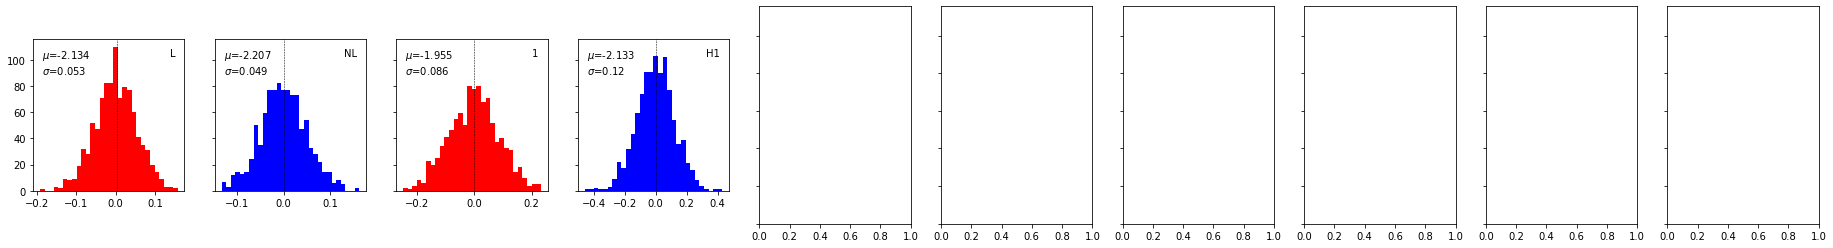

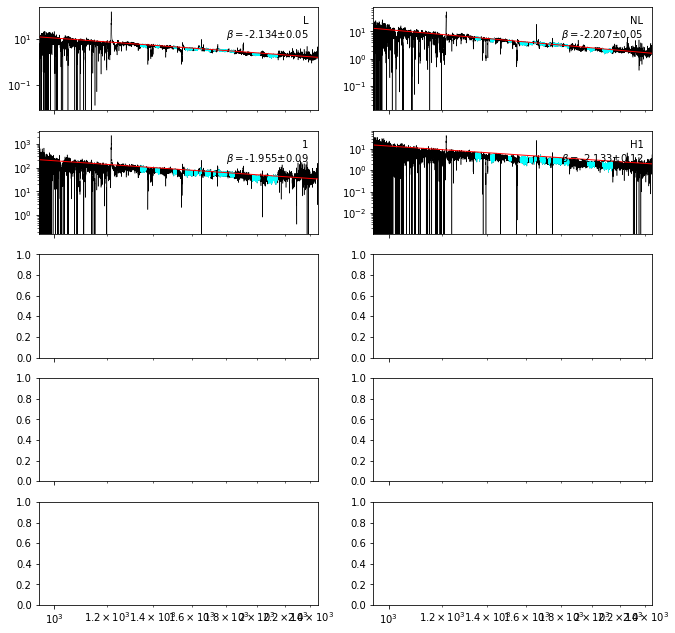

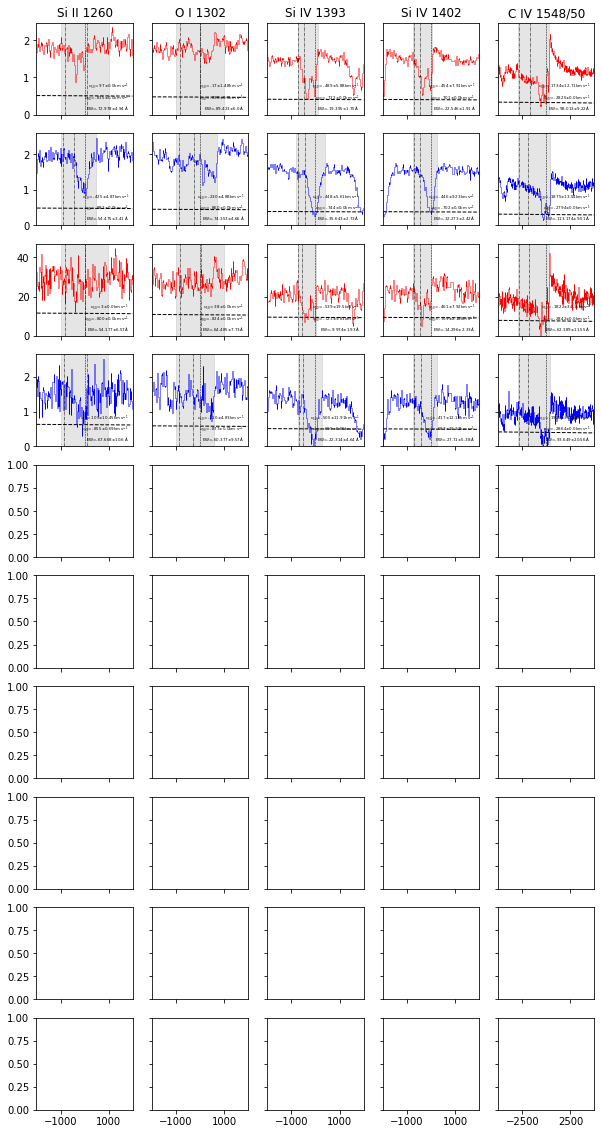

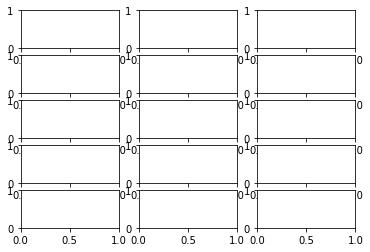

In [8]:
# Initiating iteration distribution of UV slope measurements
# of each spectrum
figH, axH = plt.subplots(1, 10, sharey='row', figsize=(32,4))
axHArr=np.array(axH).reshape(-1)

# Initiating figure of iteration averaged MagE spectra against
# average power law fit to UV slope
figS, axS = plt.subplots(5, 2, sharex='col', figsize=(11,11))
axSArr=np.array(axS).reshape(-1)

# Intiating figure of absorption features of each spectrum
figA, axA = plt.subplots(len(slits), len(name), sharey='row', sharex='col', figsize=(2*len(name),2*len(slits)))

figL, axL = plt.subplots(len(name), 3)
axLArr = np.array(axL).reshape(-1)

# For each slit
for i, _ in enumerate(slits): #np.indices(np.shape(slits)).flatten():
    
    if i==0:
        sr=18
    else:
        sr=13
    
    #Converting .txt file with MAGE data into a data frame
    dataFrame=pd.read_csv(data+'/'+files[i], delimiter='\t', header=0, skiprows=sr)

    #Discarding missing data
    dataFrame=dataFrame.apply(pd.to_numeric,errors='coerce').dropna()

    #Discarding extreme outliers
    dataFrame=dataFrame[dataFrame.iloc[:,1]<1e-20]

    #Resetting the index
    dataFrame=dataFrame.reset_index(drop=True)

    # Extracting wavelength, flux, and noise
    wArr=dataFrame.iloc[:,0].to_numpy()
    fArr=(dataFrame.iloc[:,1].to_numpy())*((2.998e18)/(np.square(wArr)))
    nArr=(dataFrame.iloc[:,2].to_numpy())*((2.998e18)/(np.square(wArr)))
    
    wArrR = wArr / (1.0 +z[i])
    
    # 1565-1605, 1645-1655, 1675-1705, 1725-1735, 1755-1805, 1820-1840, 1970-2020, 2075-2135
    
    # Boolean condition for moving wavelengths free from strong features
    contW=( ((wArr >= 1345.0*(1.0+z[i])) & (wArr <= 1370.0*(1.0+z[i])))
           | ((wArr >= 1415.0*(1.0+z[i])) & (wArr <= 1435.0*(1.0+z[i])))
           | ((wArr >= 1505.0*(1.0+z[i])) & (wArr <= 1520.0*(1.0+z[i])))
           | ((wArr >= 1565.0*(1.0+z[i])) & (wArr <= 1605.0*(1.0+z[i])))
           | ((wArr >= 1615.0*(1.0+z[i])) & (wArr <= 1635.0*(1.0+z[i])))
           | ((wArr >= 1645.0*(1.0+z[i])) & (wArr <= 1654.0*(1.0+z[i])))
           | ((wArr >= 1675.0*(1.0+z[i])) & (wArr <= 1705.0*(1.0+z[i])))
           | ((wArr >= 1725.0*(1.0+z[i])) & (wArr <= 1735.0*(1.0+z[i])))
           | ((wArr >= 1755.0*(1.0+z[i])) & (wArr <= 1805.0*(1.0+z[i])))
           | ((wArr >= 1820.0*(1.0+z[i])) & (wArr <= 1850.0*(1.0+z[i])))
           | ((wArr >= 1970.0*(1.0+z[i])) & (wArr <= 2020.0*(1.0+z[i])))
           | ((wArr >= 2075.0*(1.0+z[i])) & (wArr <= 2145.0*(1.0+z[i])))
          )
    
    contWR=( ((wArrR >= 1345.0) & (wArrR <= 1370.0))
           | ((wArrR >= 1415.0) & (wArrR <= 1435.0))
           | ((wArrR >= 1505.0) & (wArrR <= 1520.0))
           | ((wArrR >= 1565.0) & (wArrR <= 1605.0))
           | ((wArrR >= 1615.0) & (wArrR <= 1635.0))
           | ((wArrR >= 1645.0) & (wArrR <= 1654.0))
           | ((wArrR >= 1675.0) & (wArrR <= 1705.0))
           | ((wArrR >= 1725.0) & (wArrR <= 1735.0))
           | ((wArrR >= 1755.0) & (wArrR <= 1805.0))
           | ((wArrR >= 1820.0) & (wArrR <= 1850.0))
           | ((wArrR >= 1970.0) & (wArrR <= 2020.0))
           | ((wArrR >= 2075.0) & (wArrR <= 2145.0))
          )
    
    # Array of rest wavelength ranges free from strong features
    ranges=np.array([[1345.0, 1370.0], [1415.0, 1435.0], [1505.0, 1520.0],
                     [1565.0, 1605.0], [1615.0, 1635.0], [1645.0, 1654.0],
                     [1675.0, 1705.0], [1725.0, 1735.0], [1755.0, 1805.0],
                     [1820.0, 1850.0], [1970.0, 2020.0], [2075.0, 2145.0]]
                     #[2222.0, 2232.0], [2275.0, 2288.0]
                    )
    
    wArrFit = wArrR[contWR]
    fArrFit = (fArr * (1.0 + z[i]))[contWR]
    
    # Fitting power law to sampled continuum
    popt, pcov = curve_fit(plaw, wArrFit, fArrFit * 1e17, maxfev=1000)
    
    aArr=np.array([])
    betaArr=np.array([])
    fTArr=np.array([])
    
    ewTArr=np.empty(np.shape(l))
    
    n = 0
    
    while n != 1000:
        
        # Adding random Gaussian noise to the flux with standard deviation
        # given by the reported noise
        smthg = np.random.normal(fArr, nArr)
        
        ind = np.random.choice(np.arange(0, len(wArrFit), 1), int(round(0.1 * len(wArrFit))), replace=False)
        #print(ind)
        
        #wArrFit = np.take(wArrFit, ind)
        #fArrFit = np.take(smthg[contWR], ind)
        
        # Fitting power law to selected feature-free segments of the perturbed spectrum
        poptN, _ = curve_fit(plaw, np.take(wArrFit, ind), np.take(smthg[contWR], ind) * (1.0 + z[i]) * 1e17, maxfev=1000)
        
        # Summing up the flux at each wavelength
        # from each iteration
        if n==0:
            fTArr = np.append(fTArr, smthg)
        else:
            fTArr = fTArr + smthg
        
        # Storing best-fit power law parameters
        aArr=np.append(aArr, poptN[0])
        betaArr = np.append(betaArr, poptN[1])
        
        ewArr=np.array([])
        v50Arr=np.array([])
        v90Arr=np.array([])
        
        # For each absorption line
        for p, j in enumerate(l):
            
            vMin=ewRanges[i,p,0]
            vMax=ewRanges[i,p,1]
            
            wMin=j*((vMin/(3e5))+1)*(1+z[i])
            wMax=j*((vMax/(3e5))+1)*(1+z[i])
            
            fArrJ = fArr[(wArr >= wMin) & (wArr <= wMax)]*1e17
            fitJ = plaw(wArr, *poptN)[(wArr >= wMin) & (wArr <= wMax)]
            wArrJ = wArr[(wArr >= wMin) & (wArr <= wMax)]
            
            # Compute the equivalent width
            e = ewidth(wArrJ,fArrJ,fitJ)
            
            ewArr = np.append(ewArr, e)
            
            '''
            
            plt.plot(wArrJ,fArrJ)
            plt.show()
            
            '''
            
            eFArr=np.array([])
            
            for t, _ in enumerate(wArrJ):
                
                eF = ewidth(wArrJ[t:-1], fArrJ[t:-1], fitJ[t:-1])/e
                
                eFArr = np.append(eFArr, eF)
                
            #print(eFArr)
            
            w50 = ((wArrJ[eFArr >= 0.5][-1])+(wArrJ[eFArr <= 0.5][0]))/2.0
            w90 = ((wArrJ[eFArr >= 0.9][-1])+(wArrJ[eFArr <= 0.9][0]))/2.0
            
            #print(eFArr >= 0.5)
            #print(wArrJ[eFArr >= 0.5])
            
            v50=(3e5)*(((w50/(1.0+np.float64(z[i])))/j)-1.0)
            v90=(3e5)*(((w90/(1.0+np.float64(z[i])))/j)-1.0)
            
            v50Arr = np.append(v50Arr, v50)
            v90Arr = np.append(v90Arr, v90)
            
                
            '''
            plt.plot(eFArr, wArrJ)
            plt.xlabel('Fraction of total EW')
            plt.ylabel('Wavelength (Ang.)')
            
            plt.show()
            
            '''
            
        ewArr=np.array([ewArr])
        v50Arr=np.array([v50Arr])
        v90Arr=np.array([v90Arr])
            
        if n == 0:
            ewTArr = ewArr
            v50TArr = v50Arr
            v90TArr = v90Arr
            
        else:
            ewTArr = np.append(ewTArr, ewArr, axis=0)
            v50TArr = np.append(v50TArr, v50Arr, axis=0)
            v90TArr = np.append(v90TArr, v90Arr, axis=0)
        
        n = n+1
    
    for a, _ in enumerate(l):
    
        tArr[i, a, 0, 0] = np.mean(v50TArr[:,a])
        tArr[i, a, 0, 1] = np.std(v50TArr[:,a])
        
        tArr[i, a, 1, 0] = np.mean(v90TArr[:,a])
        tArr[i, a, 1, 1] = np.std(v90TArr[:,a])
        
        tArr[i, a, 2, 0] = np.mean(ewTArr[:,a])
        tArr[i, a, 2, 1] = np.std(ewTArr[:,a])
    
    #print(ewTArr)
        
    # Setting plot colors
    if lyc[i]:
        c='red'
    else:
        c='blue'
    
    # Computing average spectrum of
    # the perturbed spectra
    fAvgArr=(fTArr/1000.0)*1e17
    
    #ewAvgArr=ewTArr/1000.0
        
    # Populating histogram distribution of the UV slope for each iteration
    # (compared to value from 'true' spectrum)
    axHArr[i].hist(betaArr-np.mean(betaArr), bins=30, color=c)
    axHArr[i].axvline(popt[1]-np.mean(betaArr), ls='dashed', c='black')
    
    # Adding mean and standard deviation of UV slope measurements of each slit to its histogram distribution
    meanstd=AnchoredText('$\mu$='+str(round(np.mean(betaArr),3))+'\n'+'$\sigma$='+str(round(np.std(betaArr),3)),
                         loc='upper left', frameon=False
                         )
    label=AnchoredText(slits[i], loc='upper right', frameon=False)
    axHArr[i].add_artist(meanstd)
    axHArr[i].add_artist(label)
    
    # Setting histogram plot in square frame
    axHArr[i].set_box_aspect(1)
    
    # Plotting average spectrum of perturbed spectra
    axSArr[i].plot(wArr / (1.0 + z[i]), fAvgArr * (1.0 + z[i]), ds='steps-mid', c='black')
    
    # Overlaying the continuum sampled for the fit in cyan
    for h in ranges:
        #axSArr[i].plot(wArr[(wArr >= h[0]*(1.0+z[i])) & (wArr <= h[1]*(1.0+z[i]))],
        #               fAvgArr[(wArr >= h[0]*(1.0+z[i])) & (wArr <= h[1]*(1.0+z[i]))], c='cyan')
        axSArr[i].plot((wArr / (1.0 + z[i]))[(wArr / (1.0 + z[i]) >= h[0]) & (wArr / (1.0 + z[i]) <= h[1])],
                       (fAvgArr * (1.0 + z[i]))[(wArr / (1.0 + z[i]) >= h[0]) & (wArr / (1.0 + z[i]) <= h[1])], c='cyan')
    
    # Plotting power law fit corresponding to mean parameters
    axSArr[i].plot(wArr / (1.0 + z[i]), plaw(wArr / (1.0 + z[i]), np.mean(aArr), np.mean(betaArr)), c='red', lw=1.0)
    axSArr[i].set_xlim(np.min(wArr / (1.0 + z[i])), np.max(wArr / (1.0 + z[i])))
    #axSArr[i].set_xlim(2350.0*(1+z[i]), 2400.0*(1+z[i]))
    #axSArr[i].set_ylim(0.0, 3*np.median(fArr*1e17))
    print(np.mean(aArr))
    
    # Adding slit name and slope value / error to corner of each spectrum plot
    namebeta=AnchoredText(slits[i]+'\n'+r'$\beta=$'+str(round(np.mean(betaArr),3))+r'$\pm$'+str(round(np.std(betaArr),2)),
                    loc='upper right', prop=dict(ha='right'), frameon=False)
    axSArr[i].add_artist(namebeta)
    
    # Setting scale of spectra plots as logarithmic
    axSArr[i].set_xscale('log')
    axSArr[i].set_yscale('log')
    
    # For each absorption line
    for m, _ in enumerate(name):
        
        # Convert wavelength into peculiar velocity space of line
        vArr=(3e5)*(((wArr/(1.0+np.float64(z[i])))/l[m])-1.0)
        
        #Min=l[m]*((-1000.0/(3e5))+1)*(1+z[i])
        #Max=l[m]*((1000.0/(3e5))+1)*(1+z[i])
        #print(Min, Max)
        
        # Cut arrays to +/- 3000 km/s window
        vel=plotRanges[i, m, 1]
        
        wArrJ=wArr[(vArr >= -vel) & (vArr <= vel)]
        fArrJ=fAvgArr[(vArr >= -vel) & (vArr <= vel)]
        contFitJ=plaw(wArr, np.mean(aArr), np.mean(betaArr))[(vArr >= -vel) & (vArr <= vel)]
        vArrJ=vArr[(vArr >= -vel) & (vArr <= vel)]
        
        # Plot iteration averaged line against average fit; shade integrated region in EW calculation
        axA[i,m].plot(vArrJ, contFitJ, ls='dashed', lw=1.0, c='black')
        axA[i,m].plot(vArrJ,fArrJ,c=c,ds='steps-mid')
        axA[i,m].axvline(0.0,c='black',ls='dashed')
        axA[i,m].axvline(np.mean(v50TArr[:,m]), ls='dashdot', c='black', label=r'$v_{50}$')
        axA[i,m].axvline(np.mean(v90TArr[:,m]), ls='dashdot', c='black', label=r'$v_{90}$')
        axA[i,m].fill_between(vArrJ, 0.0, 1, where=((vArrJ >= ewRanges[i, m, 0]) & (vArrJ <= ewRanges[i, m, 1])),
                              color='gray', transform=axA[i,m].get_xaxis_transform(), alpha=0.2)
        
        axA[i,m].set_xlim(-vel, vel)
        axA[i,m].set_xticks((-0.5*vel,0.5*vel))
        axA[i,m].set_ylim(0.0)
        
        #axLArr[i].errorbar(np.mean(v50TArr[:,m]), 0, xerr=np.std(v50TArr[:,m]), marker=slits[i], capsize=1.0, color=c)
        
        if i == 0:
            axA[0,m].set_title(name[m])
        
        if m == 5:
            
            axA[i,m].yaxis.set_label_position("right")
            axA[i,m].set_ylabel(slits[i])
        
        #print(np.shape(v50TArr),np.shape(v90TArr))
        
        # Add EW, v50, v90 measurements to plot
        info=AnchoredText(r'$v_{50}=$'+str(round(np.mean(v50TArr[:,m])))+r'$\pm$'+str(round(np.std(v50TArr[:,m]),2))+'km s$^{-1}$'+'\n'
                          +r'$v_{90}=$'+str(round(np.mean(v90TArr[:,m])))+r'$\pm$'+str(round(np.std(v90TArr[:,m]),2))+'km s$^{-1}$'+'\n'
                          +'EW='+str(round(np.mean(ewTArr[:,m]),3))+r'$\pm$'+str(round(np.std(ewTArr[:,m]),2))+'$\,$Å',
                            loc='lower right', prop=dict(size=4, ha='right'), frameon=False)
        axA[i,m].add_artist(info)
        
    print(i+1)
        
    #plt.show()
    
for b, nam in enumerate(name):
    
    for c, _ in enumerate(slits):
    
        if lyc[c]:
            
            color='red'
            
        else:
            
            color='blue'
    
        axL[b,0].errorbar(tArr[c, b, 0, 0], 0, xerr=tArr[c, b, 0, 1], capsize=2.0, color=color, linewidth=0.5, marker=r'$'+slits[c]+r'$', ms=10)
        axL[b,1].errorbar(tArr[c, b, 1, 0], 0, xerr=tArr[c, b, 1, 1], capsize=2.0, color=color, linewidth=0.5, marker=r'$'+slits[c]+r'$', ms=10)
        axL[b,2].errorbar(tArr[c, b, 2, 0], 0, xerr=tArr[c, b, 2, 1], capsize=2.0, color=color, linewidth=0.5, marker=r'$'+slits[c]+r'$', ms=10)
        
    axL[b,0].yaxis.set_ticks([])
    axL[b,1].yaxis.set_ticks([])
    axL[b,2].yaxis.set_ticks([])
        
    if b==0:
        axL[b,0].set_title(r'$v_{50}$')
        axL[b,1].set_title(r'$v_{90}$')
        axL[b,2].set_title('EW')
            
    if name[b] == name[-1]:
        
        axL[b, 0].set_xlabel('km s$^{-1}$')
        axL[b,1].set_xlabel('km s$^{-1}$')
        axL[b,2].set_xlabel('Å')
        
    axL[b,2].yaxis.set_label_position('right')
    axL[b,2].set_ylabel(nam, rotation=0, labelpad=35)
        
figH.supxlabel('X-$\mu$')
figH.supylabel('Count')
figH.suptitle(r'$\beta$')

figH.tight_layout()

figH.savefig(figs+'/betahist.pdf')

figS.supxlabel(wlabel)
figS.supylabel(flabel)

figS.tight_layout()

figS.savefig(figs+'/spectraplawfit.pdf')
        
figA.supxlabel(vlabel)
figA.supylabel(flabel)

figA.tight_layout()

figA.savefig(figs+'/lines.png', dpi=200)

figL.tight_layout()

figL.savefig(figs+'/absdist.pdf')
        
plt.show()